# Дипломная работа

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
##pip install scikit-learn

In [119]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 13)

In [120]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [121]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data Cleaning

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [12]:
!pip install scikit-learn

In [23]:
from sklearn.preprocessing import LabelEncoder

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Заполняем отсутствующие значения возраста с помощью прогнозной модели RandomForestRegressor
# Создание модели случайного леса
rf = RandomForestRegressor()

# Создаем экземпляр encoder'a
label_encoder = LabelEncoder()

# Преобразовать пол
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Преобразовать класс билета
df['Pclass'] = label_encoder.fit_transform(df['Pclass'].astype(str))

# Преобразовать порт посадки
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Применяем преобразование к столбцу "Ticket"
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])

df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
# Просмотр результата
# print(df.head())

# Разделение датафрейма на наблюдения с отсутствующими значениями и без них
known_age = df[df['Age'].notnull()]
unknown_age = df[df['Age'].isnull()]

# print(unknown_age)

# Выбор признаков для обучения модели
X_train = known_age.drop('Age', axis=1)
X_train = X_train.drop('Name', axis=1) 
y_train = known_age['Age']
X_test = unknown_age.drop('Age', axis=1)
X_test = X_test.drop('Name', axis=1) 


# Обучение модели случайного леса
rf.fit(X_train, y_train)

# Прогнозирование отсутствующих значений
predicted_age = rf.predict(X_test)

# Заполнение отсутствующих значений предсказанными значениями
df.loc[df['Age'].isnull(), 'Age'] = predicted_age

In [15]:
# df['Age'].fillna(df['Age'].mean(), inplace=True)

In [125]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Charts

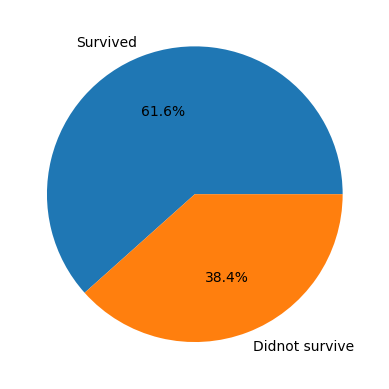

In [35]:
plt.pie(df['Survived'].value_counts(), labels=['Survived', 'Didnot survive'], autopct='%1.1f%%')
plt.show()

In [36]:
print(df['Survived'].unique())

[0 1]


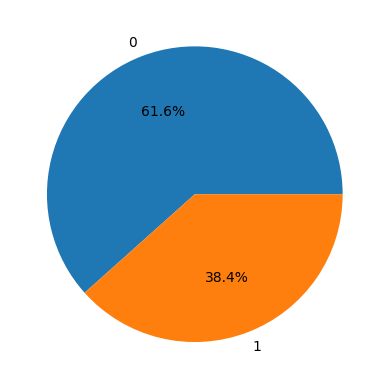

In [37]:
plt.pie(df['Survived'].value_counts(), labels=df['Survived'].unique(), autopct='%1.1f%%')
plt.show()

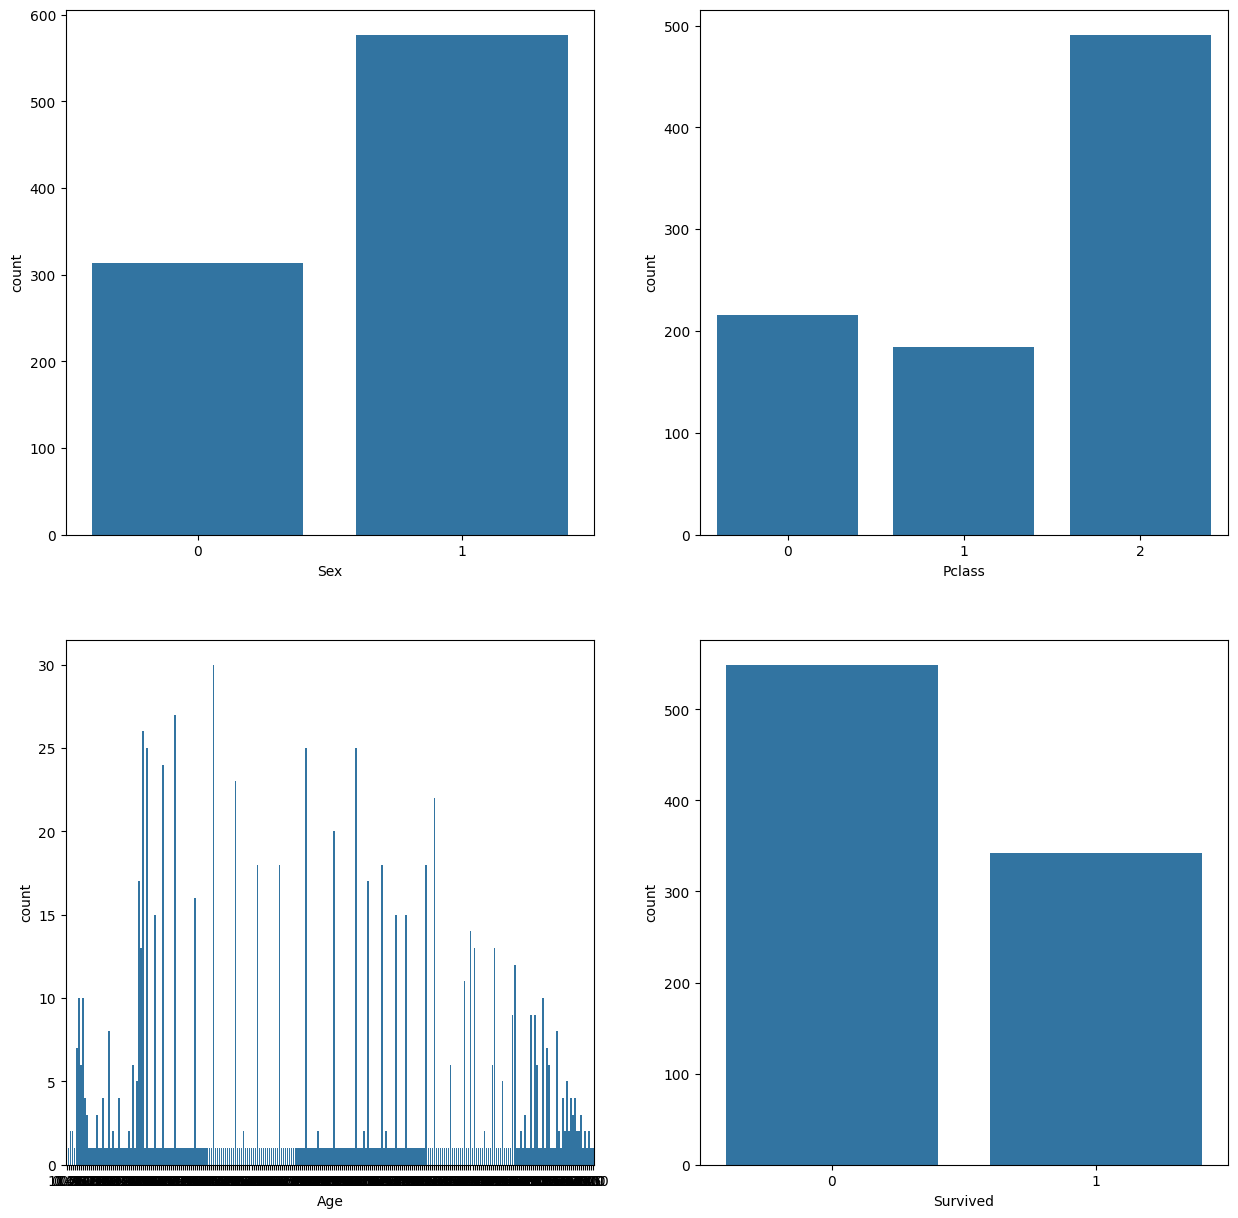

In [38]:
df.head(3)
cols = ['Sex', 'Pclass','Age' , 'Survived']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=df)
plt.show()    

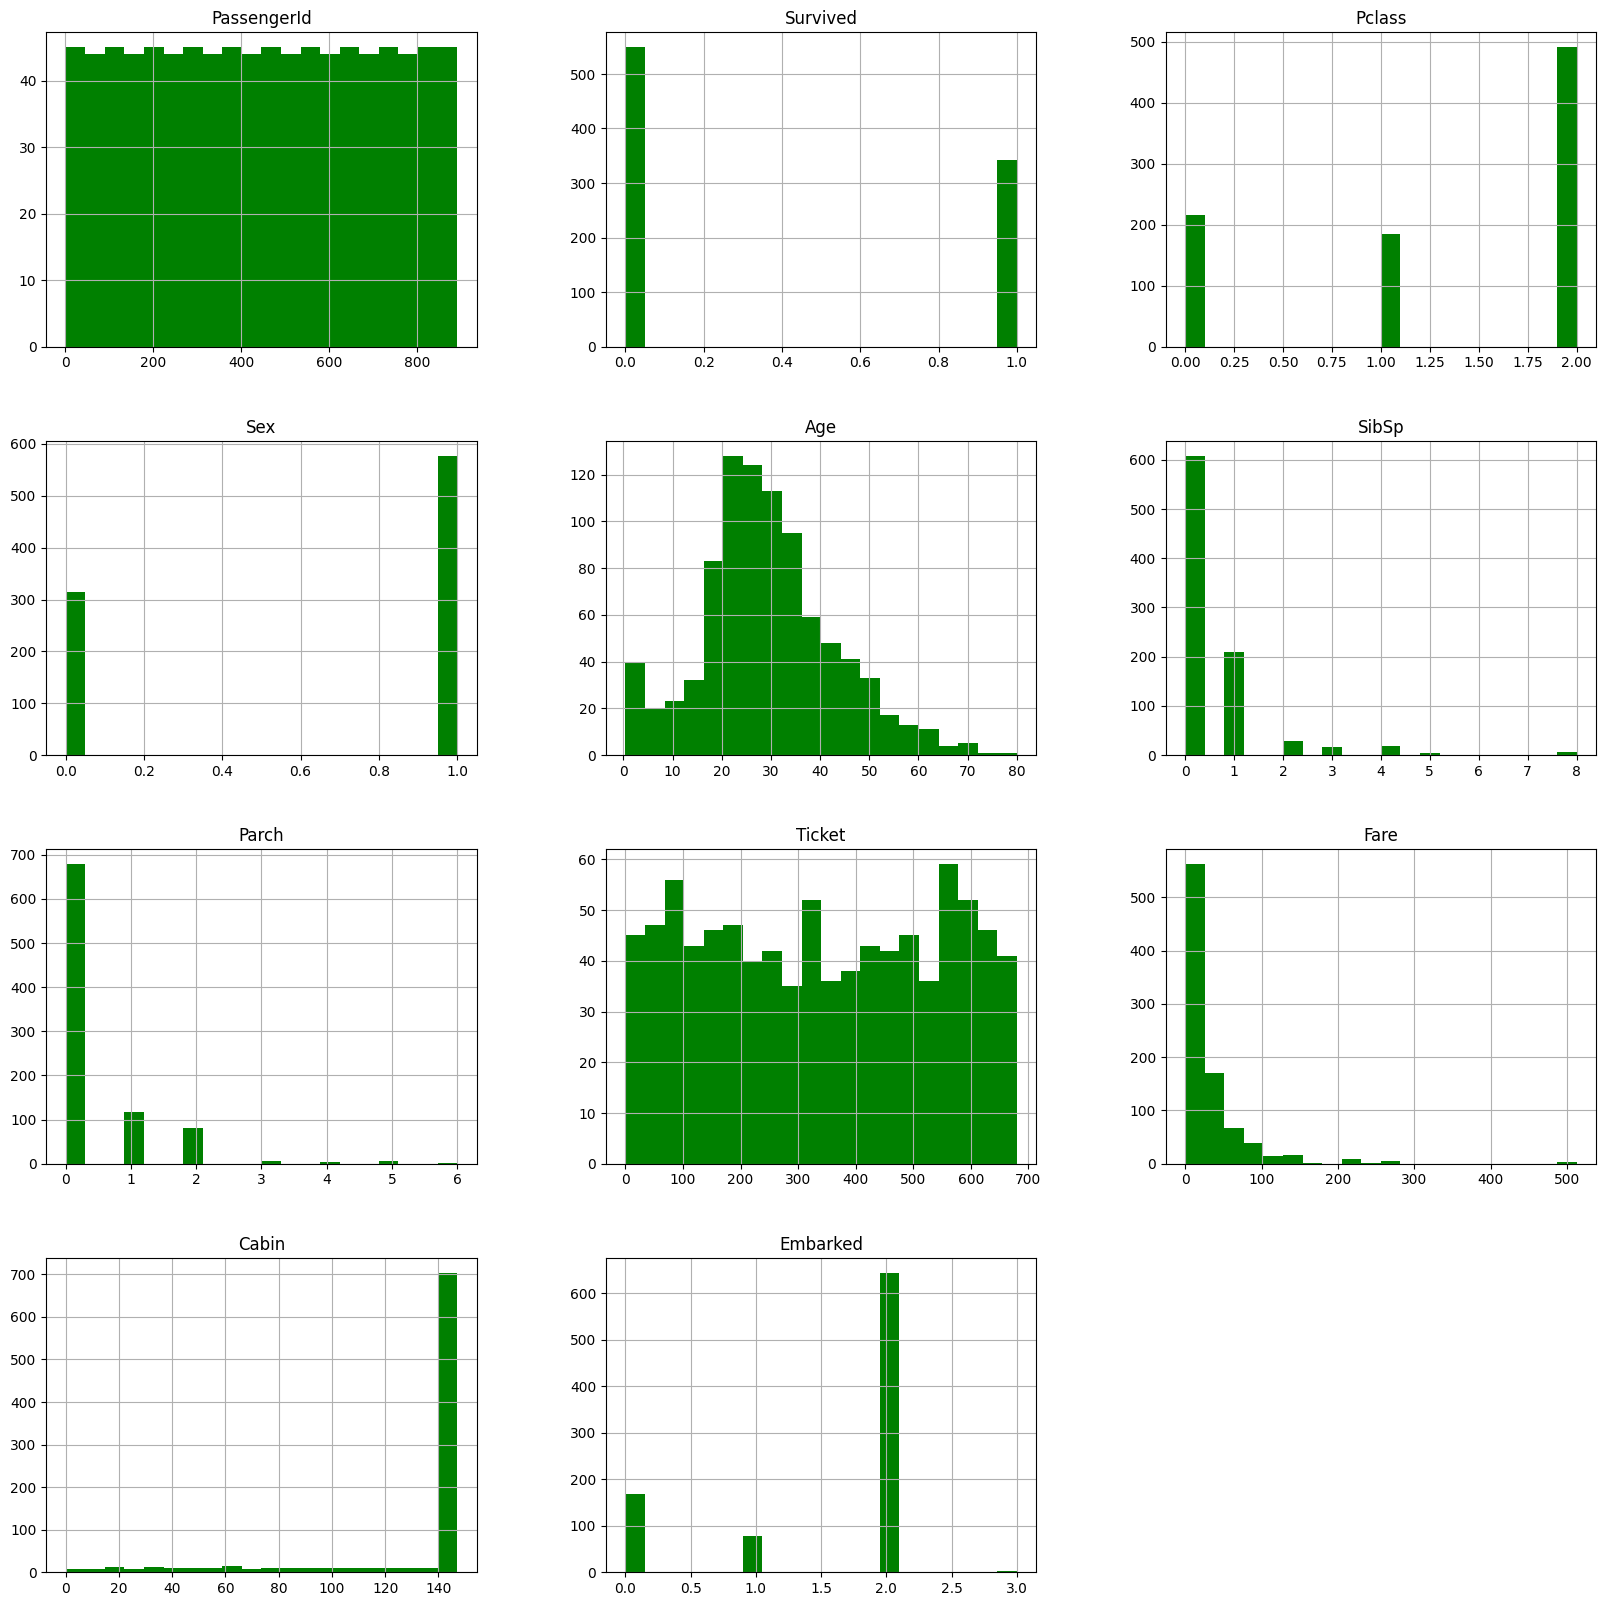

In [39]:
df.hist(bins=20, figsize=(20,20), color='green')
plt.show()

## Column Data Encoding

In [40]:
df.select_dtypes(include='object').columns

Index(['Name'], dtype='object')

In [44]:
df['Sex'].unique()

array([1, 0], dtype=int64)

In [42]:
df['Embarked'].unique()

array([2, 0, 1, 3], dtype=int64)

In [43]:
# df.replace({
#     'Sex':{
#         'male': 1,
#         'female': 0
#     }}, inplace=True)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2


In [46]:
# Otionfl 2
label_encoder = LabelEncoder()

columns = df.select_dtypes(include='object').columns

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])
    

In [47]:
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  Name  Sex    Age  SibSp  Parch  Ticket  \
0              1         0       2   108    1  22.00      1      0     523   
1              2         1       0   190    0  38.00      1      0     596   
2              3         1       2   353    0  26.00      0      0     669   
3              4         1       0   272    0  35.00      1      0      49   
4              5         0       2    15    1  35.00      0      0     472   
..           ...       ...     ...   ...  ...    ...    ...    ...     ...   
886          887         0       1   548    1  27.00      0      0     101   
887          888         1       0   303    0  19.00      0      0      14   
888          889         0       2   413    0  26.46      1      2     675   
889          890         1       0    81    1  26.00      0      0       8   
890          891         0       2   220    1  32.00      0      0     466   

        Fare  Cabin  Embarked  
0

In [50]:
a = df['Name'].unique()
print(a)

[108 190 353 272  15 554 515 624 412 576 727  95 729  28 840 359 682 867
 839 512 273  80 523 765 626  44 240 260 605 813 828 776 289 856 535 372
 505 134 837 589   7 827 446 456 212 697 473 604 726  38 629 594 333 246
 620 873 707 595 853 299 749 385 337 755 784 560 596 185  25 440 396 300
 376 161  87 546 778 563 127 223 842 737 519 141 386  52 255 764 259 149
 159  31 150 209 184 740 292 308 219 422 656 658 858 405 312 542 724 559
 675 552 667 882  67 417  46 645 178 826  70  24 362 551 575 848 857 588
 525 499 653 234 225 165 695 851 772 685 585 271 618 282  99 597 319 116
  32 586  29 254 580 121  68 643 532 889 612 866 287 181 767 716 186 847
  82 129 628 293 157 760  69 486 832 680 408 752 769 444 464 388 320 474
 717 650  41  76 441 700 601 698 101 823 664 136  20 579 113 495 533 611
 497 881 834 721 403 878 166 789  51   9 140  94  12 131 649 288 437 582
 375 390  72 338 791 105 306 581 379  83 531 492 243 467 339 460 754  43
 479 329 370 172 648 383 883 567 169 500  47 539 48

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Предположим, что ваш DataFrame называется 'df'
scaler = MinMaxScaler()
df['Name_normalized'] = scaler.fit_transform(df['Name'].values.reshape(-1, 1))
print(df['Name_normalized'])

0      0.121348
1      0.213483
2      0.396629
3      0.305618
4      0.016854
         ...   
886    0.615730
887    0.340449
888    0.464045
889    0.091011
890    0.247191
Name: Name_normalized, Length: 891, dtype: float64


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_normalized
0,1,0,2,108,1,22.0,1,0,523,7.2500,147,2,0.121348
1,2,1,0,190,0,38.0,1,0,596,71.2833,81,0,0.213483
2,3,1,2,353,0,26.0,0,0,669,7.9250,147,2,0.396629
3,4,1,0,272,0,35.0,1,0,49,53.1000,55,2,0.305618
4,5,0,2,15,1,35.0,0,0,472,8.0500,147,2,0.016854


## Additinal Chart (EDA (Exploratory Data Analysis))

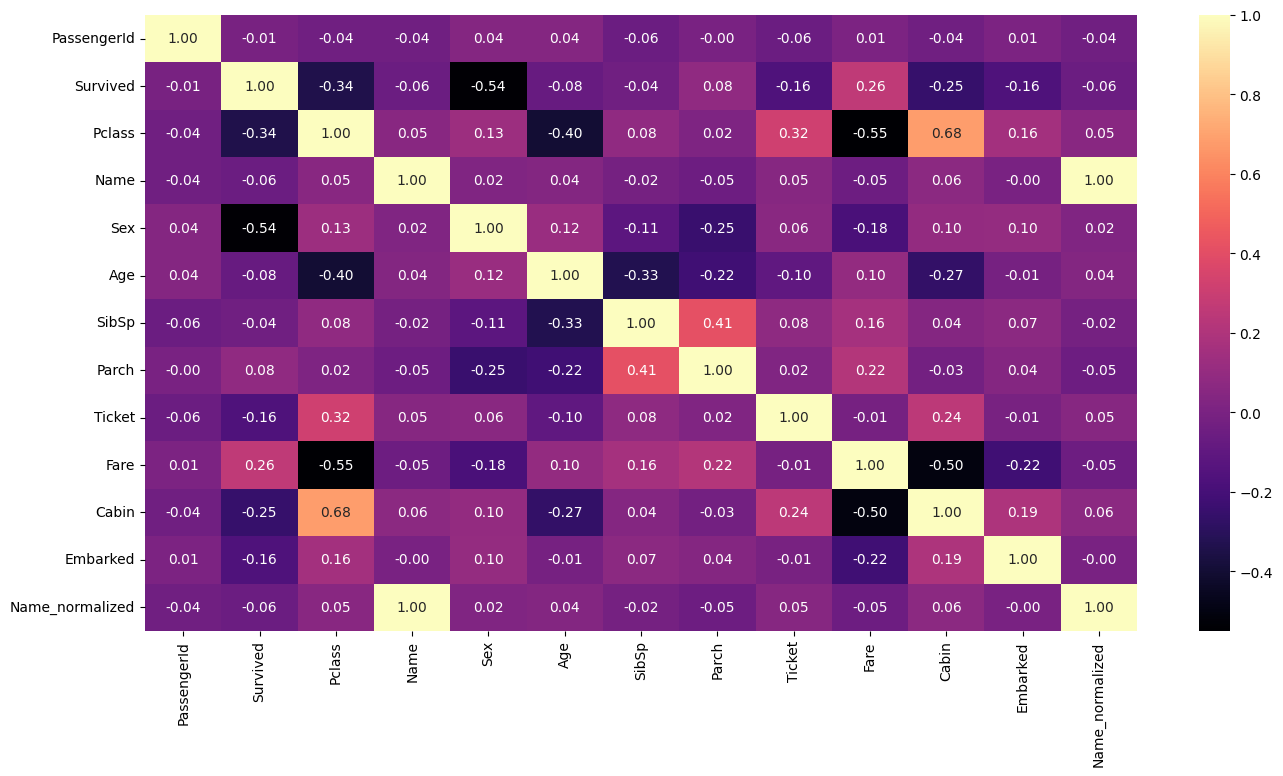

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
# sns.heatmap(df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Prognoz']).corr(), annot=True, fmt='.2f', cmap='Greens')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='magma')

plt.show()

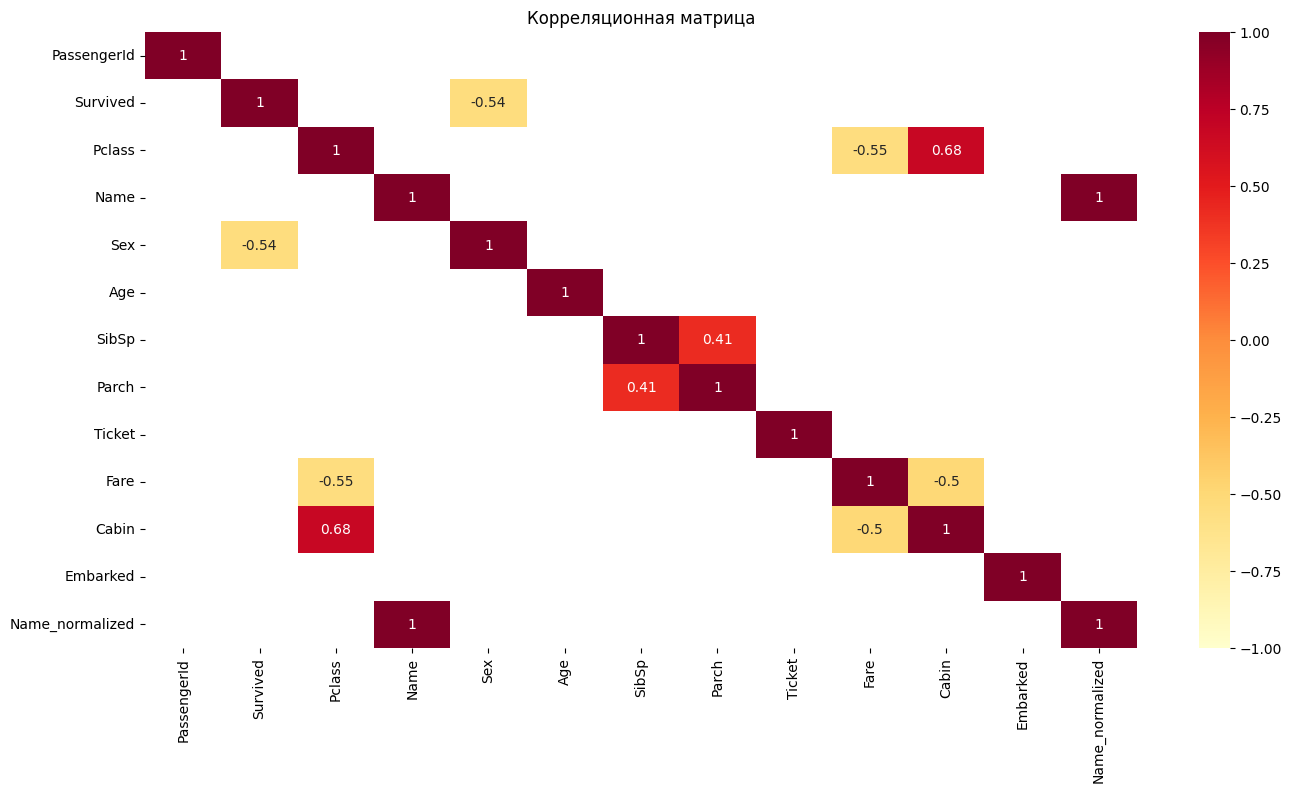

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Отфильтруем только те значения которые имеют достаточно сильную корреляцию
# Получаем матрицу корреляций
corr_matrix = df.corr()

# Устанавливаем пороговое значение
threshold = 0.4

# Создаем маску для фильтрации матрицы корреляций
mask = np.abs(corr_matrix) > threshold

# # Создаем фигуру и отображаем матрицу корреляций с фильтрацией
# plt.figure(figsize=(16, 8))
# # sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='viridis')
# sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', mask=mask, vmin=-1, vmax=1)
# Фильтруем корреляционную матрицу, оставляя только значения выше порога
filtered_corr_matrix = corr_matrix.where(np.abs(corr_matrix) > threshold)

# Создаем фигуру и отображаем отфильтрованную матрицу корреляций
plt.figure(figsize=(16, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Корреляционная матрица')

# plt.title('Корреляционная матрица') 
plt.show()

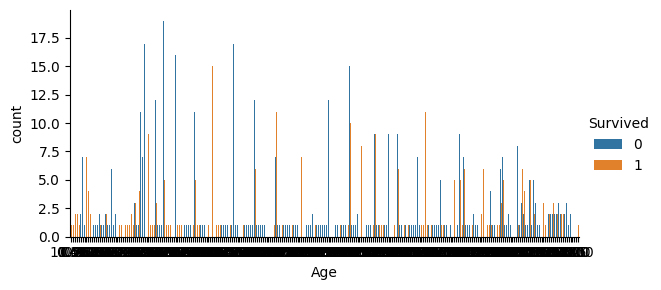

In [69]:
sns.catplot(data=df, x='Age', height=3, aspect=2, kind='count', hue='Survived')

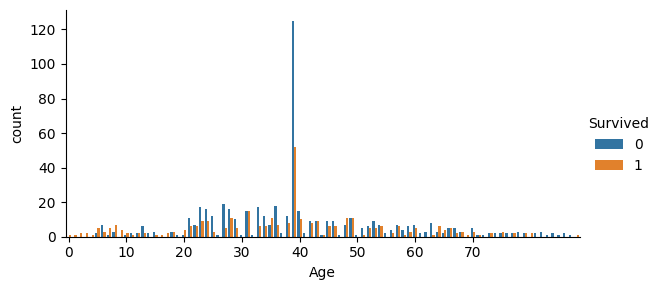

In [32]:
# Создание графика с помощью sns.catplot()
plot = sns.catplot(data=df, x='Age', height=3, aspect=2, kind='count', hue='Survived')

# Задание шага для отображения значений на оси x
plt.xticks(ticks=range(0, int(df['Age'].max()), 10), labels=range(0, int(df['Age'].max()), 10))
plt.show()

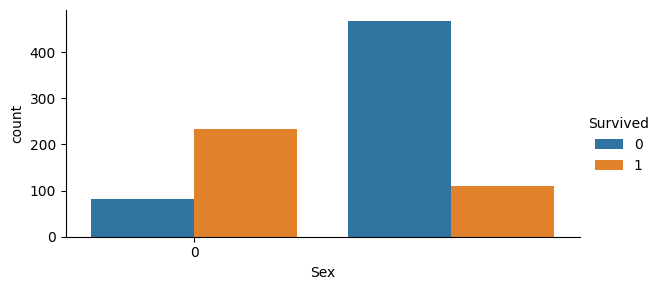

In [70]:
# Создание графика с помощью sns.catplot()
plot = sns.catplot(data=df, x='Sex', height=3, aspect=2, kind='count', hue='Survived')

# Задание шага для отображения значений на оси x
plt.xticks(ticks=range(0, int(df['Sex'].max()), 10), labels=range(0, int(df['Sex'].max()), 10))
plt.show()

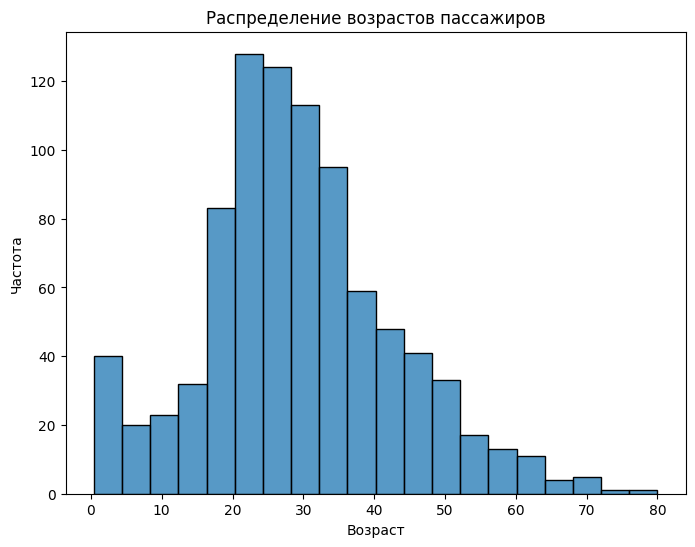

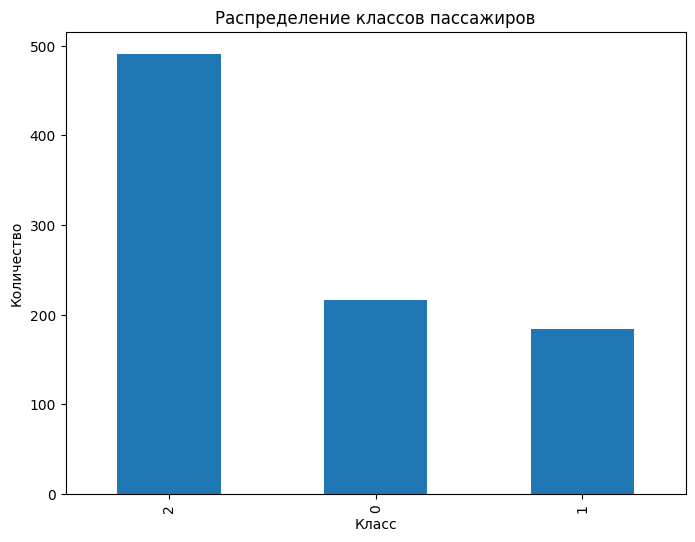

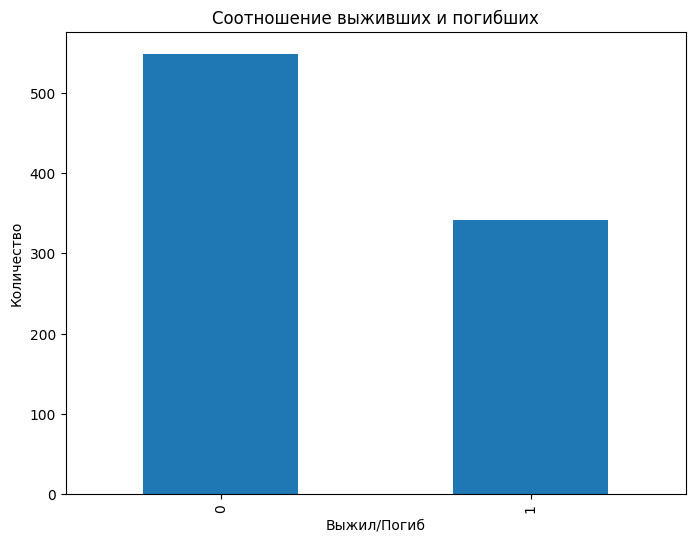

In [78]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация данных
# Распределение возрастов пассажиров
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20)
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Распределение классов пассажиров
plt.figure(figsize=(8, 6))
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Распределение классов пассажиров')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# Соотношение выживших и погибших
plt.figure(figsize=(8, 6))
df['Survived'].value_counts().plot(kind='bar')
plt.title('Соотношение выживших и погибших')
plt.xlabel('Выжил/Погиб')
plt.ylabel('Количество')
plt.show()



## Filtering Data

In [34]:
# df_cat=df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked', 'Prognoz'])

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_normalized
0,1,0,2,108,1,22.0,1,0,523,7.2500,147,2,0.121348
1,2,1,0,190,0,38.0,1,0,596,71.2833,81,0,0.213483
2,3,1,2,353,0,26.0,0,0,669,7.9250,147,2,0.396629
3,4,1,0,272,0,35.0,1,0,49,53.1000,55,2,0.305618
4,5,0,2,15,1,35.0,0,0,472,8.0500,147,2,0.016854


In [36]:
df.loc

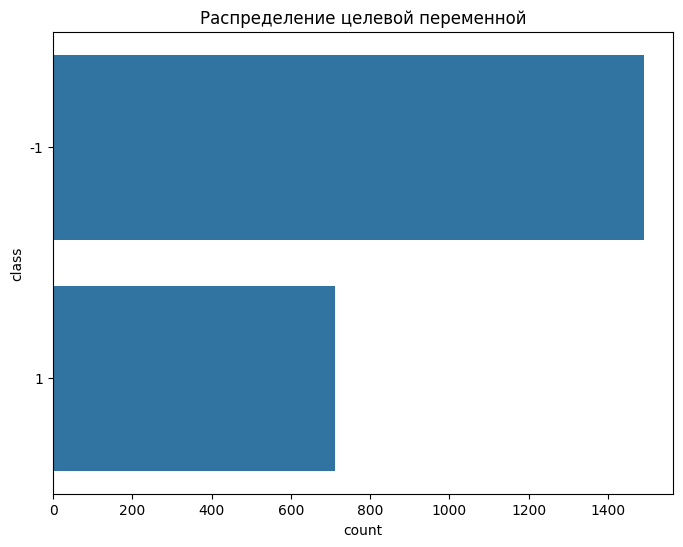

## Models


In [84]:
# Выделение целевой переменной и признаков
X = df.drop(['Survived', 'PassengerId'], axis=1)


In [83]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_normalized
0,2,108,1,22.0,1,0,523,7.2500,147,2,0.121348
1,0,190,0,38.0,1,0,596,71.2833,81,0,0.213483
2,2,353,0,26.0,0,0,669,7.9250,147,2,0.396629
3,0,272,0,35.0,1,0,49,53.1000,55,2,0.305618
4,2,15,1,35.0,0,0,472,8.0500,147,2,0.016854


In [39]:
y=df['Survived']

In [85]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [111]:
# Разделение данных на обучающую и тестовую выборки
X = X.drop(['Name_normalized', 'Name', 'Ticket'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
331,0,1,45.5,0,0,28.5000,56,2
733,1,1,23.0,0,0,13.0000,147,2
382,2,1,32.0,0,0,7.9250,147,2
704,2,1,26.0,1,0,7.8542,147,2
813,2,0,6.0,4,2,31.2750,147,2


D:\GItHUB\DS_Project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\GItHUB\DS_Project\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: LogisticRegression
Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76

Model: DecisionTreeClassifier
Accuracy: 0.80
Precision: 0.72
Recall: 0.84
F1-score: 0.78

Model: RandomForestClassifier
Accuracy: 0.85
Precision: 0.84
Recall: 0.80
F1-score: 0.82

Model: AdaBoostClassifier
Accuracy: 0.82
Precision: 0.77
Recall: 0.81
F1-score: 0.79

Model: GradientBoostingClassifier
Accuracy: 0.83
Precision: 0.83
Recall: 0.73
F1-score: 0.78



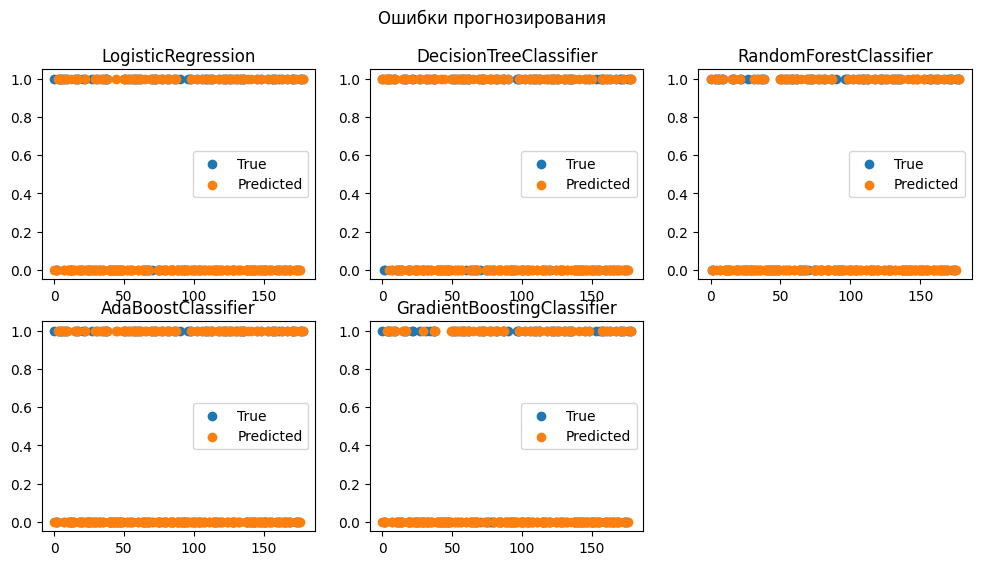

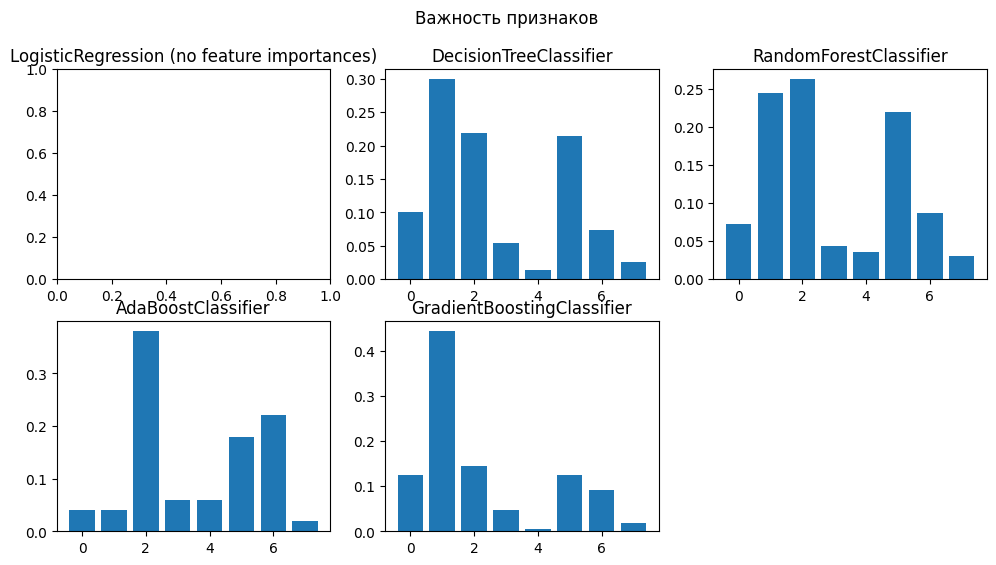

In [112]:
#  Решение задачи классификации
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Обучение и оценка моделей классификация
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print()

#  Решение задачи поиска аномалий
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1)
anomalies = model.fit_predict(X)

#  Визуализация
# Графики ошибок прогнозирования
plt.figure(figsize=(12,6))
for i, model in enumerate(models):
    plt.subplot(2, 3, i+1)
    y_pred = model.predict(X_test)
    plt.scatter(range(len(y_test)), y_test, label='True')
    plt.scatter(range(len(y_test)), y_pred, label='Predicted')
    plt.title(f"{type(model).__name__}")
    plt.legend()
plt.suptitle("Ошибки прогнозирования")
plt.show()

# Графики важности признаков
plt.figure(figsize=(12,6))
for i, model in enumerate(models):
    plt.subplot(2, 3, i+1)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plt.bar(range(len(importances)), importances)
        plt.title(f"{type(model).__name__}")
    else:
        plt.title(f"{type(model).__name__} (no feature importances)")
plt.suptitle("Важность признаков")
plt.show()


Метрики ансамбля регрессоров:
GradientBoostingRegressor: MSE = 0.13, R^2 = 0.48
RandomForestRegressor: MSE = 0.13, R^2 = 0.45
AdaBoostRegressor: MSE = 0.15, R^2 = 0.40
LinearRegression: MSE = 0.13, R^2 = 0.46
XGBRegressor: MSE = 0.13, R^2 = 0.45
R-squared scores: [0.4556890276263667, 0.441567719802368, 0.3784450018813691, 0.3798438575394657, 0.4424714792099872]


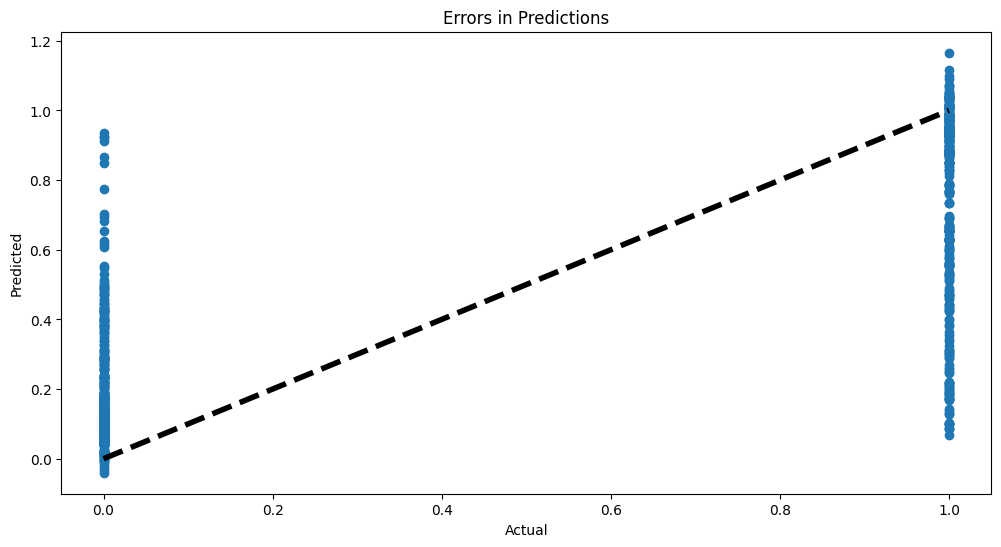

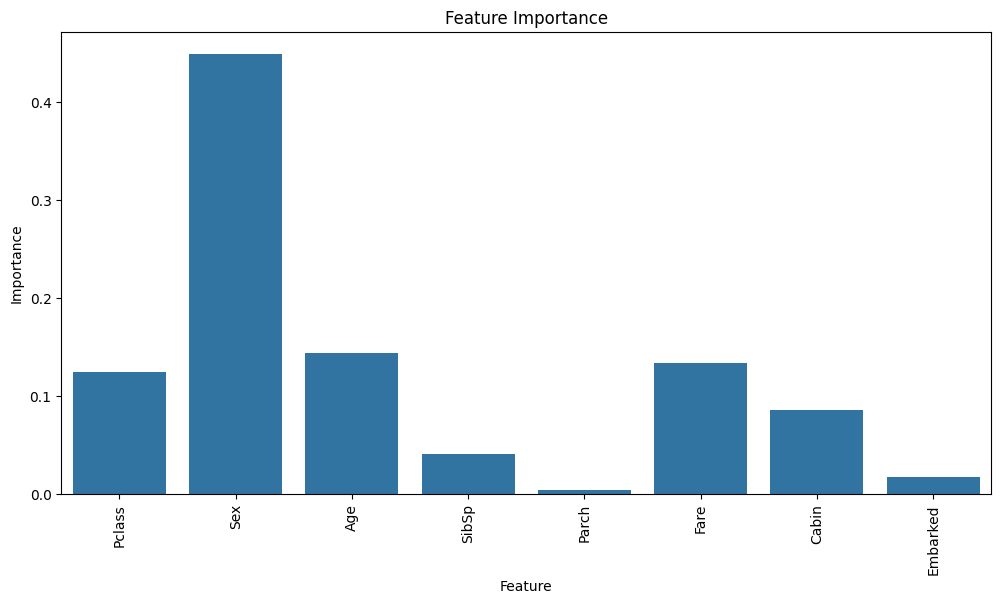

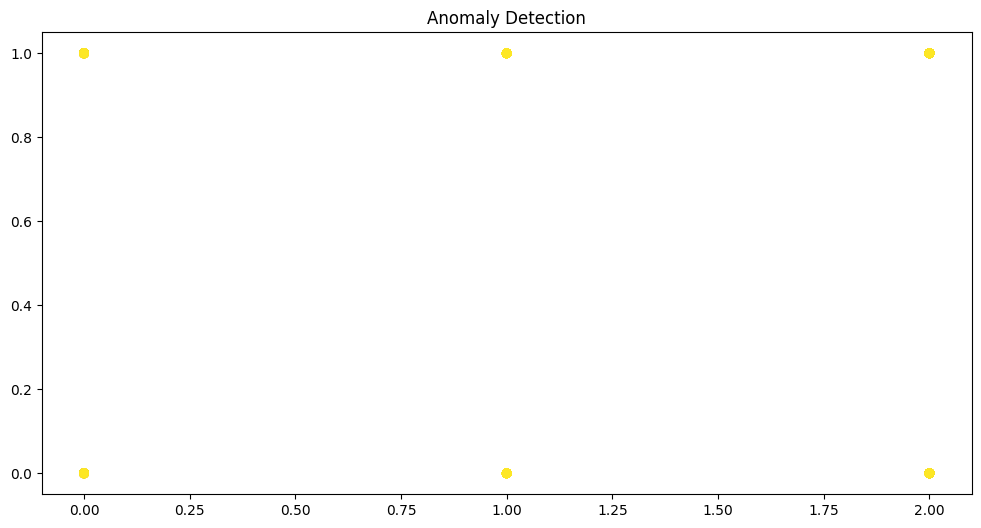

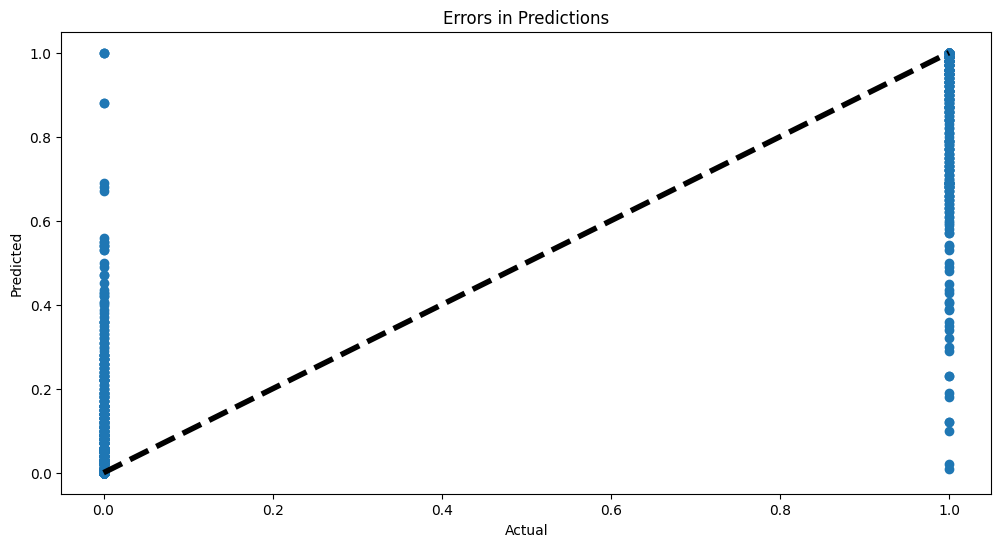

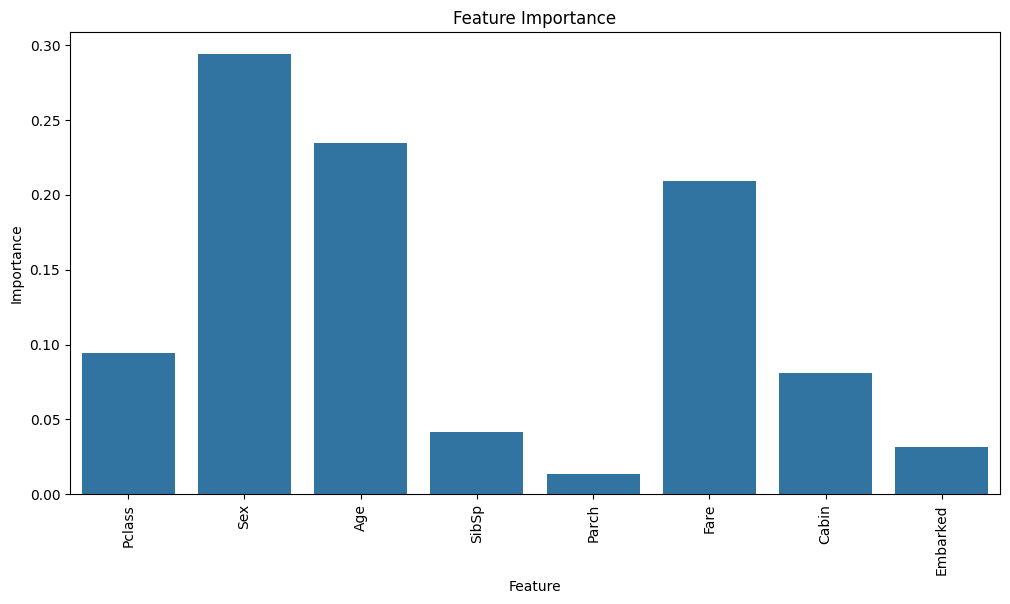

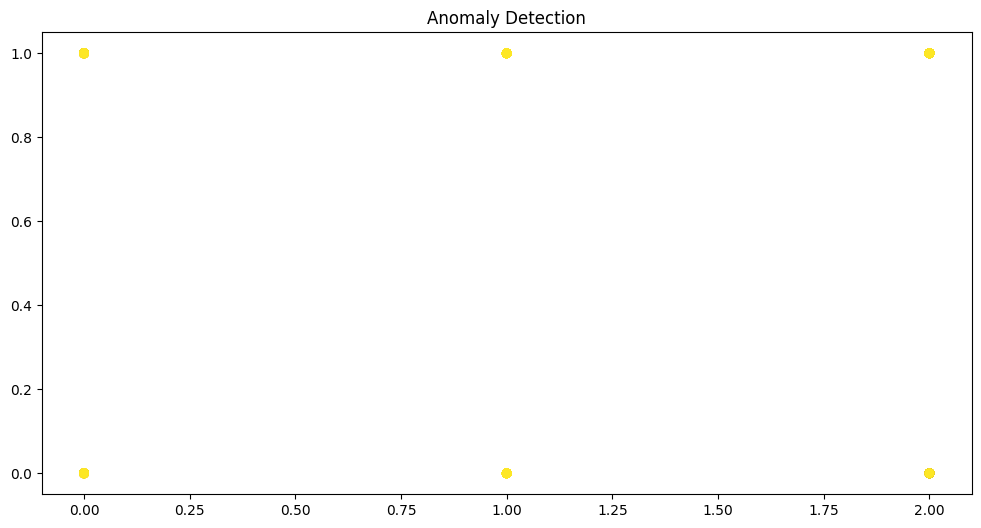

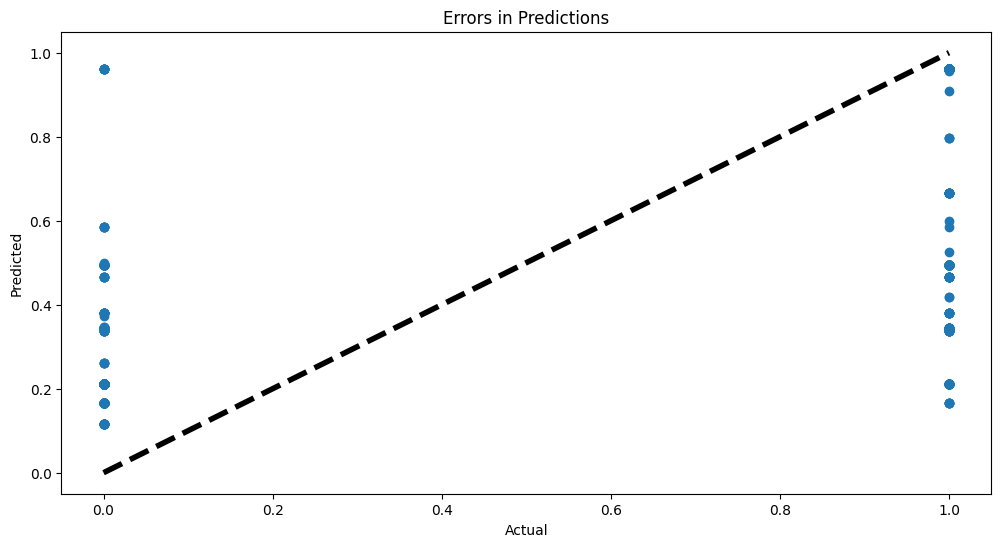

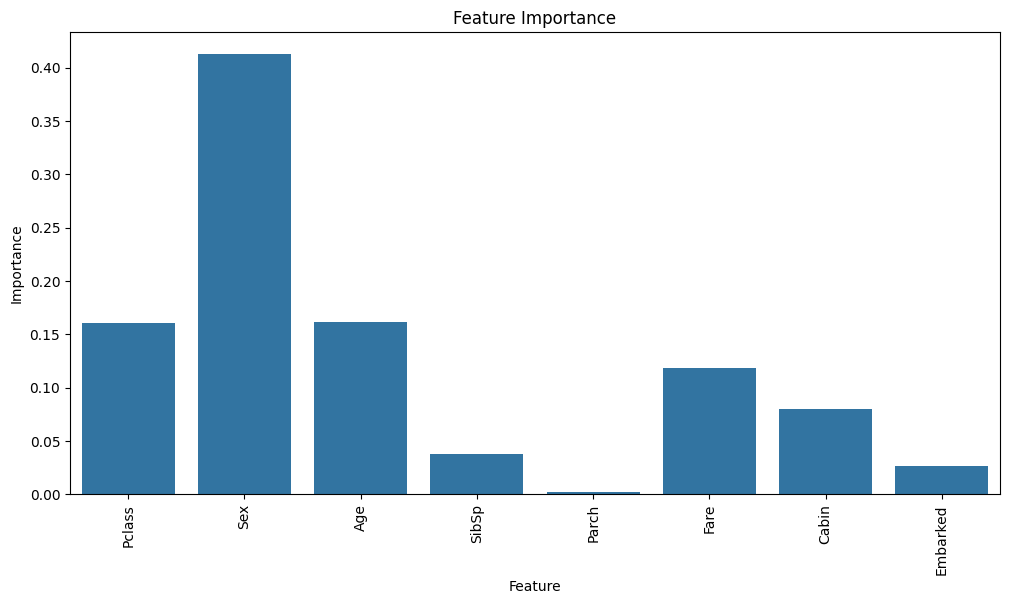

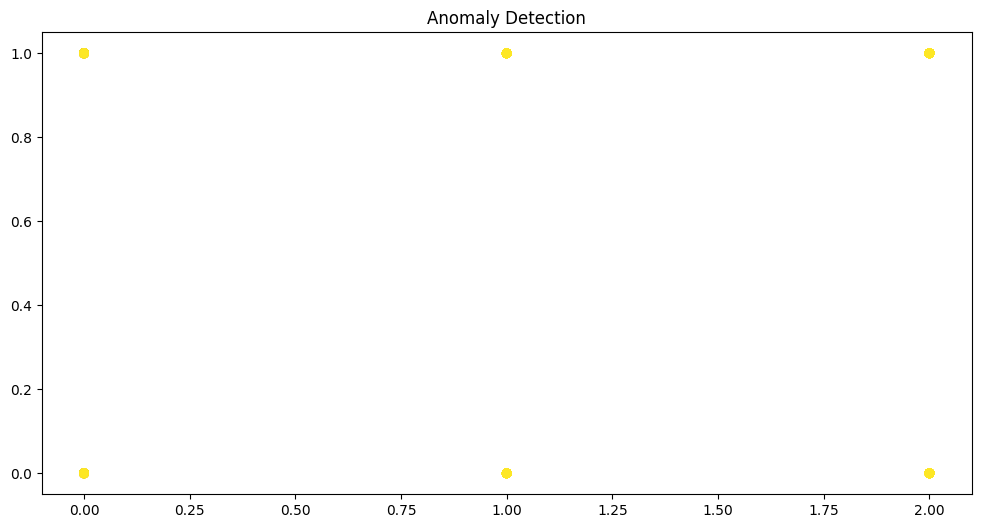

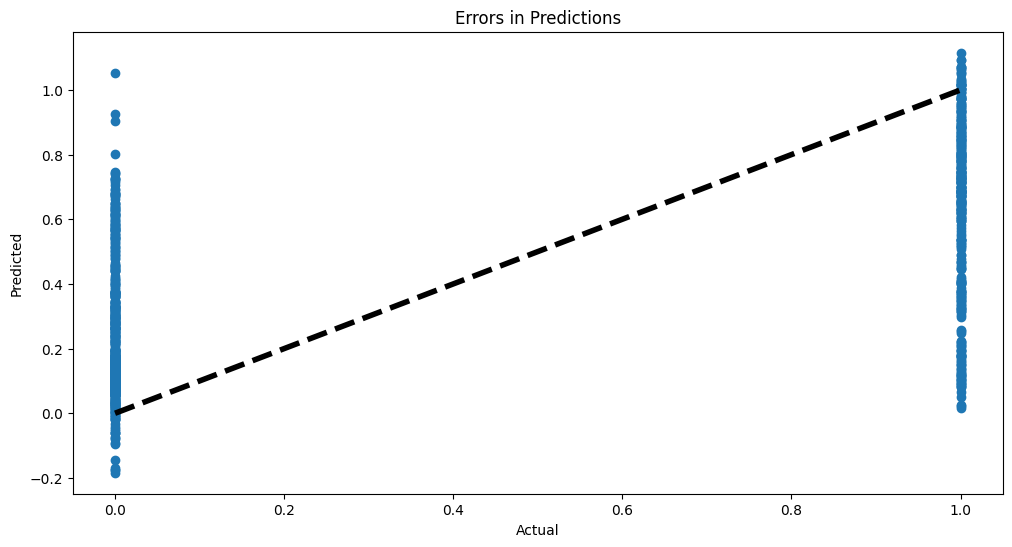

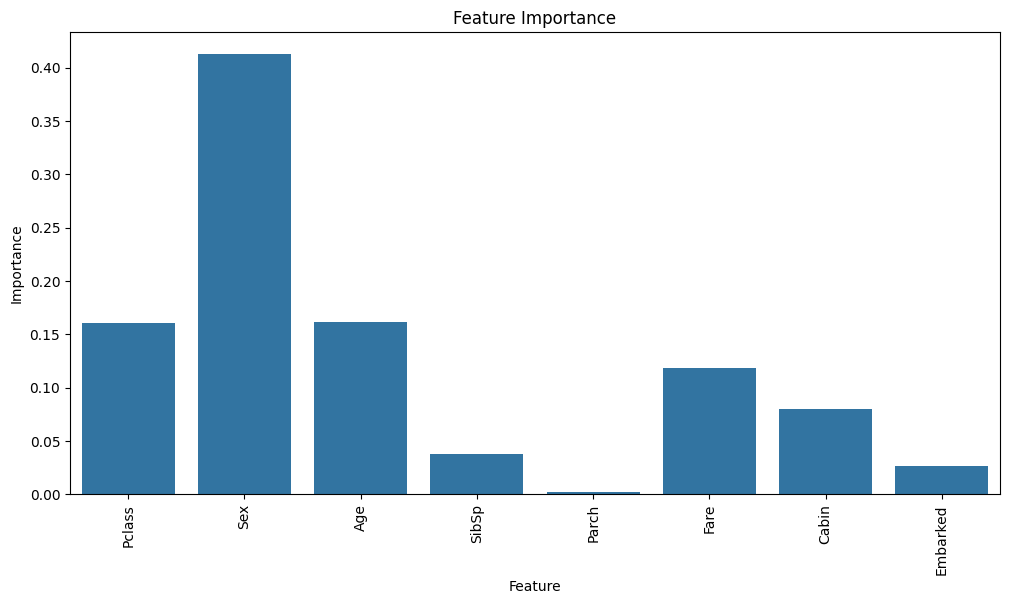

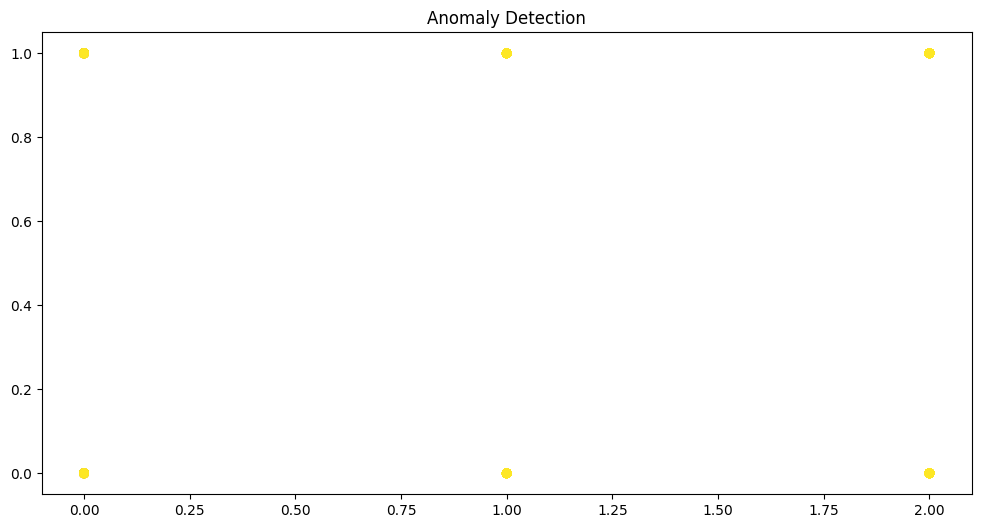

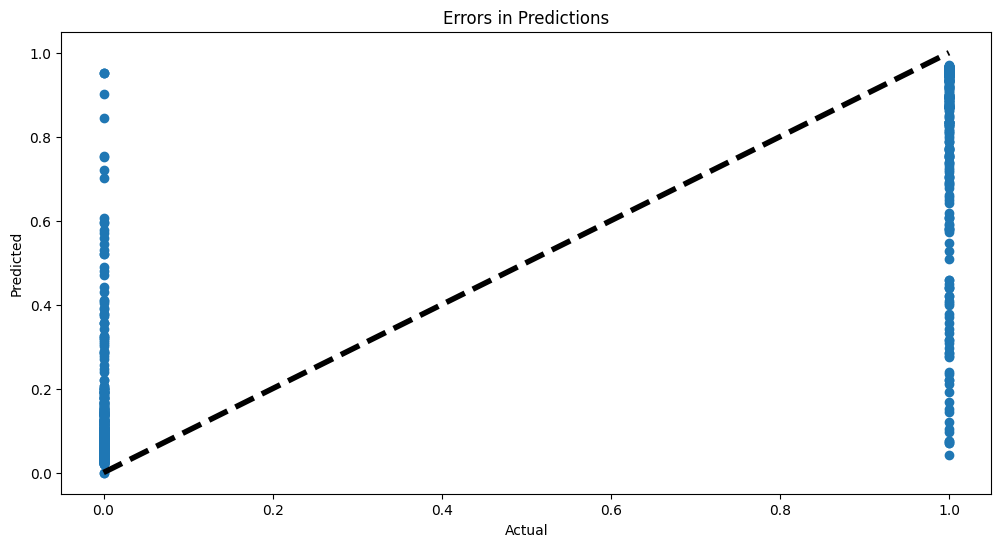

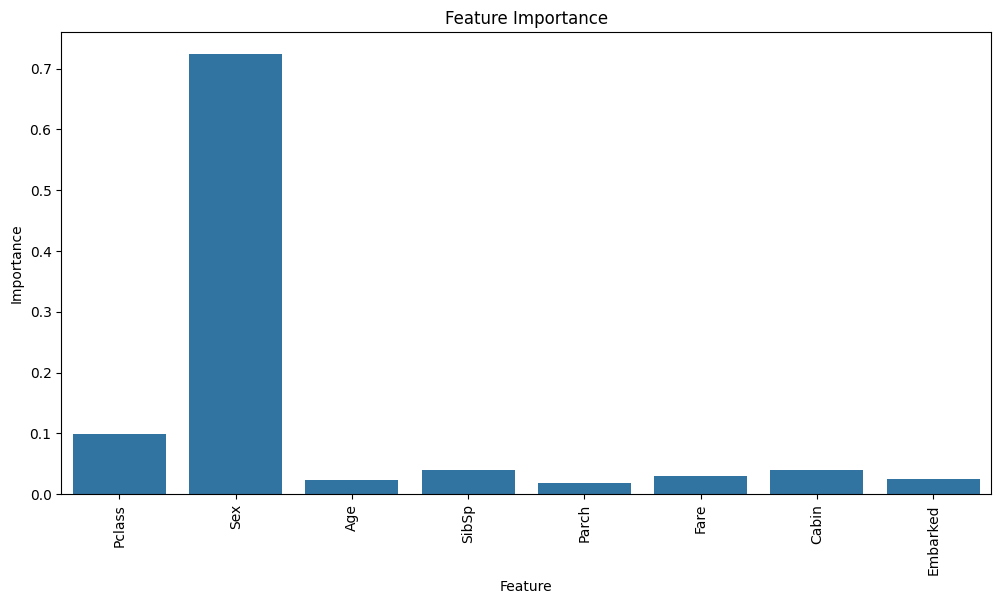

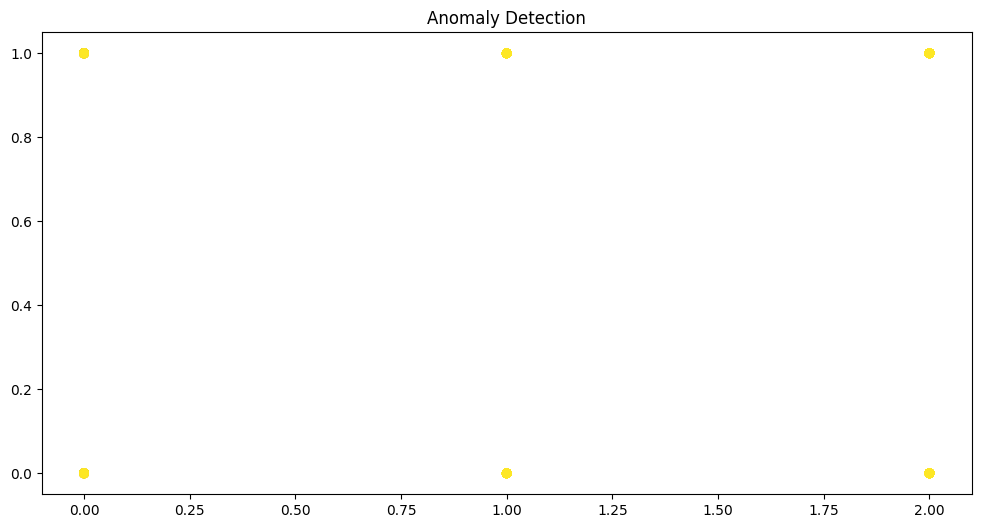

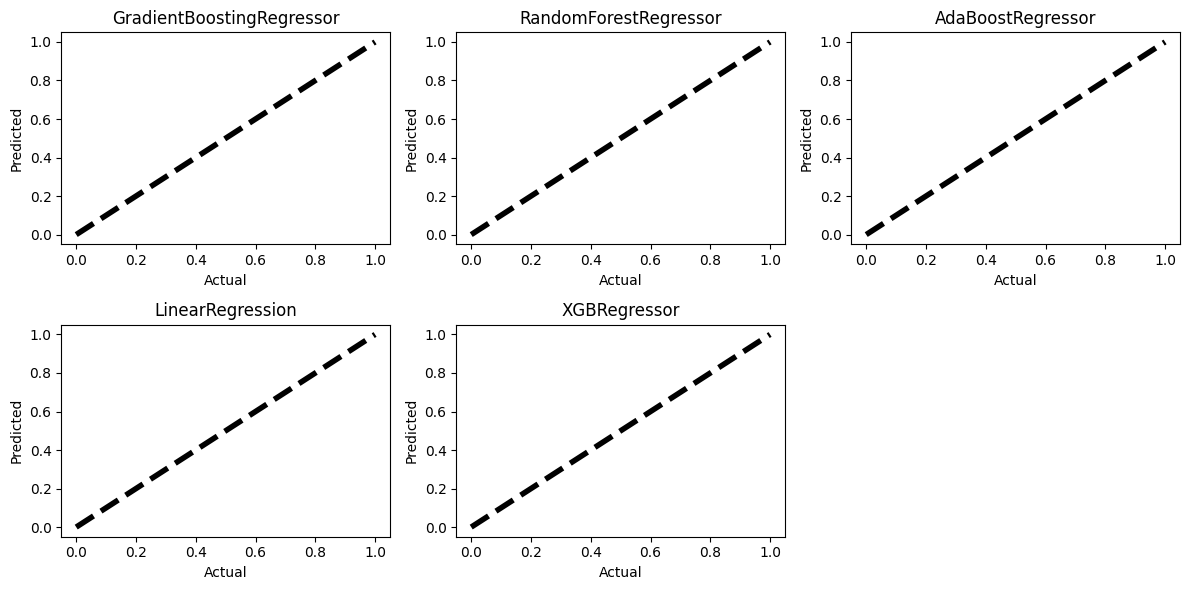

In [117]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Создание ансамбля регрессоров
regressors = [
    GradientBoostingRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    LinearRegression(),
    XGBRegressor(max_depth=10,  #Определяет максимальную глубину дерева решений 1-10
                     learning_rate=0.05,#Определяет скорость обучения модел 0.01-0.3
                     n_estimators=500,#Определяет количество деревьев решений в ансамбле 100-500
                     min_child_weight=1,#Определяет минимальную суммарную вес выборки, необходимую в дочернем узле.1-10
                     gamma=0.05,# Определяет минимальное снижение потерь, необходимое для деления узла. 0-1
                     verbosity=2)#
    # XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #    colsample_bynode=1, colsample_bytree=1, gamma=0,
    #    importance_type='gain', learning_rate=0.1, max_delta_step=0,
    #    max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
    #    n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
    #    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
    #    silent=None, subsample=1, verbosity=1) 
]

# Обучение и предсказание
y_pred = []
for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred.append(regressor.predict(X_test))

# Оценка метрик
print("Метрики ансамбля регрессоров:")
for i, regressor in enumerate(regressors):
    mse = mean_squared_error(y_test, y_pred[i])
    r2 = r2_score(y_test, y_pred[i])
    print(f"{type(regressor).__name__}: MSE = {mse:.2f}, R^2 = {r2:.2f}")

# Оценка качества ансамблевой модели
scores = []
for model in regressors:
    score = cross_val_score(model, X, y, cv=5, scoring='r2')
    scores.append(score.mean())
    # Визуализация ошибок прогнозирования
    y_pred = model.predict(X)
    plt.figure(figsize=(12, 6))
    plt.scatter(y, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Errors in Predictions')
    
    # print('nodel ' , model, ' ', str(model))
    # Визуализация важности признаков
    if str(model) != 'LinearRegression()':
        feature_importances = model.feature_importances_
    plt.figure(figsize=(12, 6))
    sns.barplot(x=X.columns, y=feature_importances)
    plt.xticks(rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    
    # Решение задачи поиска аномалий
    isolation_forest = IsolationForest(contamination=0.01)
    anomalies = isolation_forest.fit_predict(X)
    plt.figure(figsize=(12, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=anomalies)
    plt.title('Anomaly Detection')
print(f'R-squared scores: {scores}')




# Визуализация результатов
plt.figure(figsize=(12, 6))
for i, regressor in enumerate(regressors):
    plt.subplot(2, 3, i+1)
    # plt.scatter(y_test, y_pred[i])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(type(regressor).__name__)
plt.tight_layout()
plt.show()